#Analisis Ulasan Pakaian Wanita pada E-commerce Amazon Menggunakan NLTK


UTS Analisis Data Media Sosial

Anastasia Giovanka Matahelemual

6162001057

Import Data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/agiomataa/women-s_clothing_e-commerce_rating/main/dataset-uts-adms-utf-8.csv'
data = pd.read_csv(url, index_col=0)

data.head(20)

,product_name,rating,comment,link
no,,,,
1,Newchoice Womens Collared V Neck 3/4 Sleeve Sh...,4,"This is a very cute top, it has nice material,...",https://www.amazon.com/Newchoice-Business-Fitt...
2,Newchoice Womens Collared V Neck 3/4 Sleeve Sh...,5,This shirt is true to size and very comfortabl...,https://www.amazon.com/Newchoice-Business-Fitt...
3,MIROL Women's Short Sleeve Tunic Tops 2023 Bas...,5,This is one of my favorite go-to shirts. It fi...,https://www.amazon.com/MIROL-Womens-Sleeve-Shi...
4,MIROL Women's Short Sleeve Tunic Tops 2023 Bas...,4,Was what I expected and fit well.,https://www.amazon.com/MIROL-Womens-Sleeve-Shi...
5,Trendy Queen Womens Long Sleeve Shirts Fall Fa...,1,This shirt has given me an awful underarm rash...,https://www.amazon.com/Trendy-Queen-Fashion-La...
6,Trendy Queen Womens Long Sleeve Shirts Fall Fa...,2,the material for this shirt is very nice howev...,https://www.amazon.com/Trendy-Queen-Fashion-La...
7,AUTOMET Womens Long Sleeve Round Neck Shirts B...,5,The quality of this tee is so good for the pri...,https://www.amazon.com/AUTOMET-Womens-Sleeve-R...
8,AUTOMET Womens Long Sleeve Round Neck Shirts B...,4,This top is great for some; just not for me. W...,https://www.amazon.com/AUTOMET-Womens-Sleeve-R...
9,MANGOPOP Womens Short Sleeve Long Sleeve Squar...,5,I love the square neck (if you need to wear a ...,https://www.amazon.com/MANGOPOP-Womens-Sleeve-...


Import packages

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter

#NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data statistics

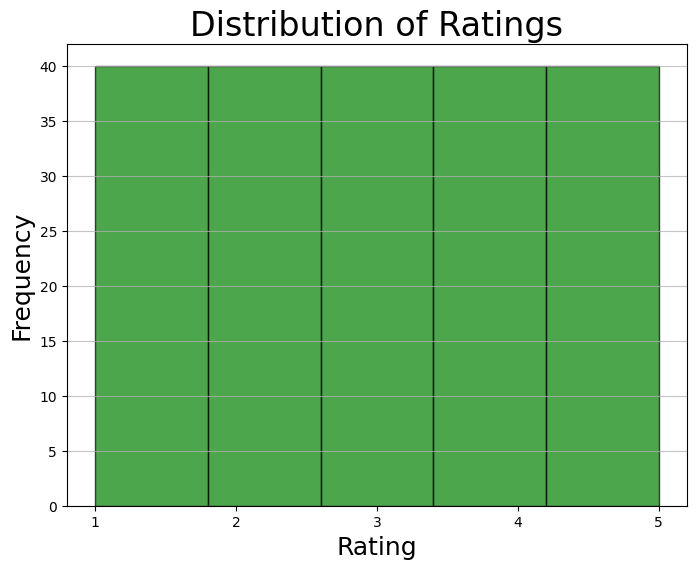

1    40
2    40
3    40
4    40
5    40
Name: rating, dtype: int64

In [3]:
# Displaying the distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['rating'], bins=5, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=24)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate the distribution of ratings
rating_distribution = data['rating'].value_counts().sort_index()

rating_distribution

In [4]:
# Pre-process the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case
    tokens = [w.lower() for w in tokens]

    # Remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    return words

# Apply pre-processing to each comment
data['processed_comments'] = data['comment'].apply(preprocess_text)



In [5]:
# Combine all words into a single list
all_words = [word for comments in data['processed_comments'] for word in comments]

# Create a frequency distribution
word_freq = Counter(all_words)

# Display the most common words
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

shirt: 71
material: 46
size: 40
love: 38
fit: 38
like: 37
color: 33
cute: 29
great: 26
quality: 26
top: 25
comfortable: 24
wear: 23
small: 23
nice: 22
good: 21
one: 21
fits: 21
returned: 21
soft: 18


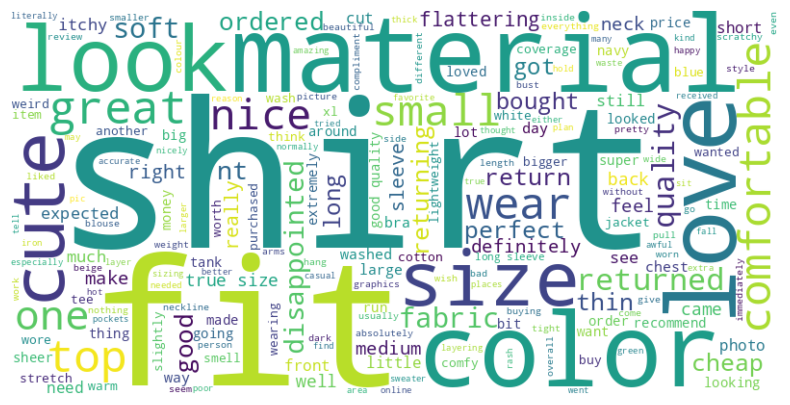

In [6]:
# Join all comments into a single string
all_comments = ' '.join([' '.join(comments) for comments in data['processed_comments']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the generated word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. wordcloud comments rating 3 and below

In [7]:
# Filter comments with rating 3 or below
low_rating_data = data[data['rating'] <= 3]

# Apply pre-processing to each comment with low rating
low_rating_data['processed_comments'] = low_rating_data['comment'].apply(preprocess_text)

<ipython-input-7-39dace51b89f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_rating_data['processed_comments'] = low_rating_data['comment'].apply(preprocess_text)


In [8]:
# Combine all words into a single list
all_words = [word for comments in low_rating_data['processed_comments'] for word in comments]

# Create a frequency distribution
word_freq = Counter(all_words)

# Display the most common words
for word, freq in word_freq.most_common(20):  # You can adjust the number of words to display
    print(f"{word}: {freq}")

shirt: 45
material: 35
like: 25
small: 21
returned: 20
fit: 20
cute: 18
disappointed: 17
top: 15
quality: 15
size: 14
returning: 14
cheap: 13
fabric: 13
return: 13
nt: 13
color: 12
thin: 12
love: 11
got: 10


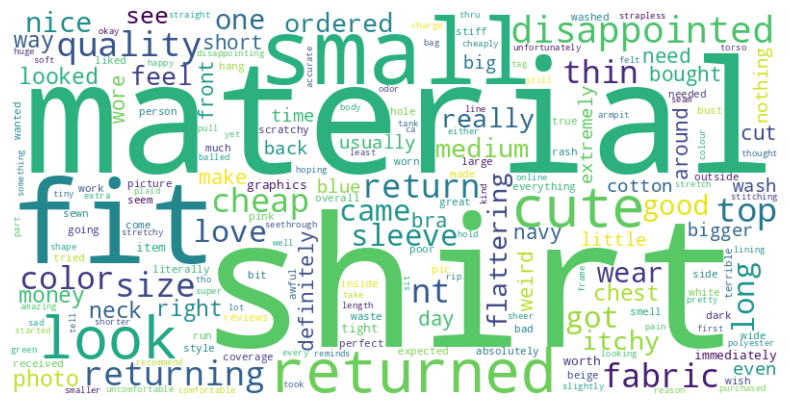

In [9]:
# Join all low rating comments into a single string
all_comments_low_rating = ' '.join([' '.join(comments) for comments in low_rating_data['processed_comments']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_low_rating)

# Display the generated word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. wordcloud comments rating 4 and above

In [10]:
# Filter comments with rating 4 or above
high_rating_data = data[data['rating'] >= 4]

# Apply pre-processing to each comment with low rating
high_rating_data['processed_comments'] = high_rating_data['comment'].apply(preprocess_text)

<ipython-input-10-474f852541f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rating_data['processed_comments'] = high_rating_data['comment'].apply(preprocess_text)


In [11]:
# Combine all words into a single list
all_words = [word for comments in high_rating_data['processed_comments'] for word in comments]

# Create a frequency distribution
word_freq = Counter(all_words)

# Display the most common words
for word, freq in word_freq.most_common(20):  # You can adjust the number of words to display
    print(f"{word}: {freq}")

love: 27
size: 26
shirt: 26
great: 23
comfortable: 22
color: 21
fit: 18
soft: 16
fits: 15
wear: 15
nice: 13
good: 12
one: 12
like: 12
cute: 11
material: 11
quality: 11
perfect: 11
top: 10
true: 10


<ipython-input-12-dd51bf29787b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_rating_data['processed_comments'] = high_rating_data['comment'].apply(preprocess_text)


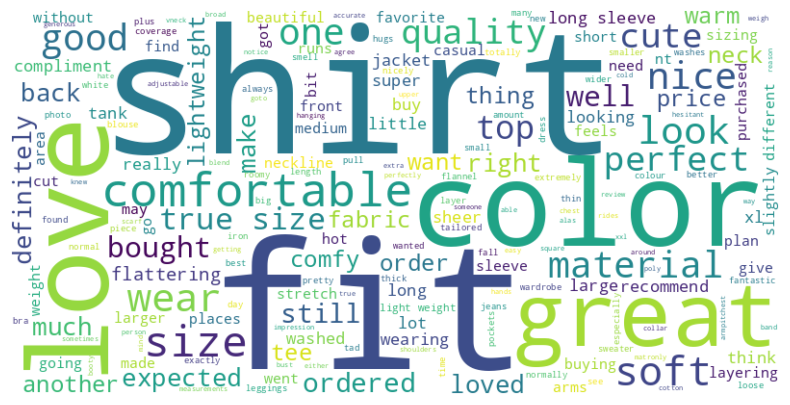

In [12]:
# Apply pre-processing to each comment with low rating
high_rating_data['processed_comments'] = high_rating_data['comment'].apply(preprocess_text)

# Join all low rating comments into a single string
all_comments_low_rating = ' '.join([' '.join(comments) for comments in high_rating_data['processed_comments']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_low_rating)

# Display the generated word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()